### 可视化主要方式

- 将流量转换为图像的样子, 进行可视化.
- 因为流量切割为 784 bytes, 所以图像为 28*28 大小

### 最终结果呈现

- 每个类别的流量选出 9 组数据，拼成一个正方形
- 对 12 种流量都进行这种操作

In [1]:
import numpy as np

In [9]:
# 定义公共变量
pcap_file = '../../data/npy_data/784_session_all/train-pcap.npy'
label_file = '../../data/npy_data/784_session_all/train-labels.npy'
label2index = {'Chat': 0, 'Email': 1, 'FT': 2, 'P2P': 3, 'Streaming': 4, 'VoIP': 5, 'VPN_Chat': 6, 'VPN_Email': 7, 'VPN_FT': 8, 'VPN_P2P': 9, 'VPN_Streaming': 10, 'VPN_VoIP': 11}
index2label = {0: 'Chat', 1: 'Email', 2: 'FT', 3: 'P2P', 4: 'Streaming', 5: 'VoIP', 6: 'VPN_Chat', 7: 'VPN_Email', 8: 'VPN_FT', 9: 'VPN_P2P', 10: 'VPN_Streaming', 11: 'VPN_VoIP'}

In [5]:
pcap_data = np.load(pcap_file) # 获得 pcap 文件
label_data = np.load(label_file) # 获得 label 数据

In [7]:
print('pcap 文件的大小 {}; label 文件的大小 {}.'.format(pcap_data.shape, label_data.shape))

pcap 文件的大小 (49986, 784); label 文件的大小 (49986,).


### 获取每个 label 对应的流量

返回一个 , 其对应每个 label 下面在数据中的 index, 返回数据类似下面:

```python
{'Chat': array([ 1673, 39514, 26278, 13334,  6806,  4569,   954, 27839, 27223], dtype=int64),
 'Email': array([18571, 21893, 10787, 38534, 14350, 38534, 34030, 46927, 25510], dtype=int64),
 'FT': array([19054, 47421, 13231, 26426, 27857,  2457, 26282,  6244,  9320], dtype=int64),
 'P2P': array([ 9801, 29550,   790, 22951,  3483,  8598,  2939, 14788, 24016], dtype=int64),
 'Streaming': array([ 5226,  8167, 37103, 19809, 11887, 15768, 45705, 42629, 12964], dtype=int64),
 'VoIP': array([24238, 40926,  5284, 24034,  4485, 11884, 43896, 37194,  8319], dtype=int64),
 'VPN_Chat': array([33816, 24887, 45908,  9795, 35206, 16959,  7135, 10946, 45083], dtype=int64),
 'VPN_Email': array([17643, 28602, 21079, 18175, 13280, 17643, 15787,   320, 21089], dtype=int64),
 'VPN_FT': array([22994, 38353, 15101, 37794,  1360, 16100,  7270,  1170,    15], dtype=int64),
 'VPN_P2P': array([27529, 44379, 20259, 38929, 10582,  1027, 47762, 14967, 45646], dtype=int64),
 'VPN_Streaming': array([41607, 10674, 26326, 16917,  1618, 20325, 35473, 26841, 15699], dtype=int64),
 'VPN_VoIP': array([48932,  2871, 15895, 20508,  6948,  2024, 41934, 13496, 19161], dtype=int64)}
```

In [18]:
sample_num = 9 # 对于每一类取样的个数
label_list = {}
for label_index, label_name in index2label.items():
    random_labels_list = np.random.choice(np.where(label_data==label_index)[0], sample_num)
    label_list[label_name] = random_labels_list

In [19]:
label_list

{'Chat': array([ 1673, 39514, 26278, 13334,  6806,  4569,   954, 27839, 27223],
       dtype=int64),
 'Email': array([18571, 21893, 10787, 38534, 14350, 38534, 34030, 46927, 25510],
       dtype=int64),
 'FT': array([19054, 47421, 13231, 26426, 27857,  2457, 26282,  6244,  9320],
       dtype=int64),
 'P2P': array([ 9801, 29550,   790, 22951,  3483,  8598,  2939, 14788, 24016],
       dtype=int64),
 'Streaming': array([ 5226,  8167, 37103, 19809, 11887, 15768, 45705, 42629, 12964],
       dtype=int64),
 'VoIP': array([24238, 40926,  5284, 24034,  4485, 11884, 43896, 37194,  8319],
       dtype=int64),
 'VPN_Chat': array([33816, 24887, 45908,  9795, 35206, 16959,  7135, 10946, 45083],
       dtype=int64),
 'VPN_Email': array([17643, 28602, 21079, 18175, 13280, 17643, 15787,   320, 21089],
       dtype=int64),
 'VPN_FT': array([22994, 38353, 15101, 37794,  1360, 16100,  7270,  1170,    15],
       dtype=int64),
 'VPN_P2P': array([27529, 44379, 20259, 38929, 10582,  1027, 47762, 14967, 45

### 绘制一个图像

尝试将一个 pcap 文件转换为图像.

In [35]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

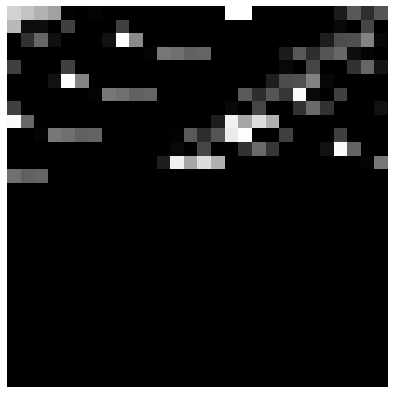

In [40]:
# 将数据转换为 28*28 大小
image_data = pcap_data[100]
image_data = image_data.reshape(28, 28)
im = Image.fromarray(image_data)

# 使用 matplotlib 显示图像
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axes.axis("off")
axes.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

### 将某一类多张图片拼接在一起

- 通过子图来实现图像的拼接

In [56]:
def save_pcap_image(pcap_name, pcap_index_list, pcap_data):
    fig, axs = plt.subplots(3,3, figsize=(7, 7), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=0.05, wspace=0.001)
    axs = axs.ravel()

    for i,j in enumerate(pcap_index_list):
        axs[i].axis("off") # 关闭子图的坐标轴
        image_data = pcap_data[j] # 获得对应的数据
        image_data = image_data.reshape(28, 28)
        im = Image.fromarray(image_data)
        axs[i].imshow(im, cmap='gray', vmin=0, vmax=255)
    
    plt.savefig('{}.jpg'.format(pcap_name))

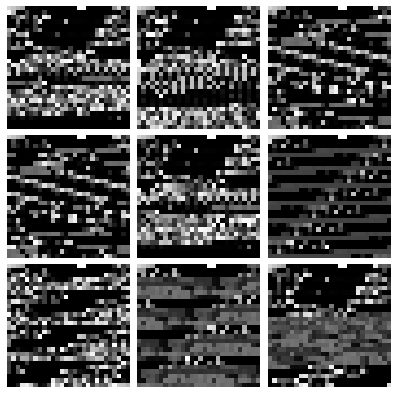

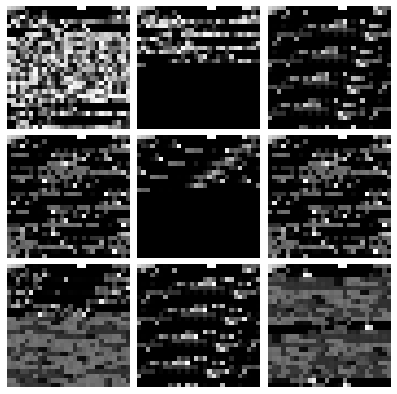

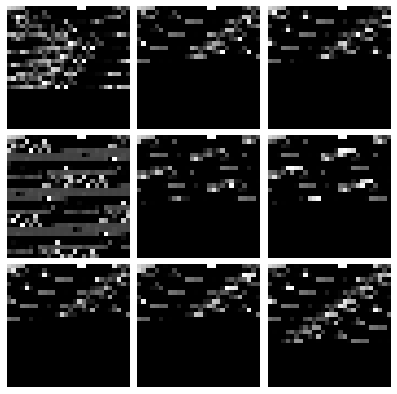

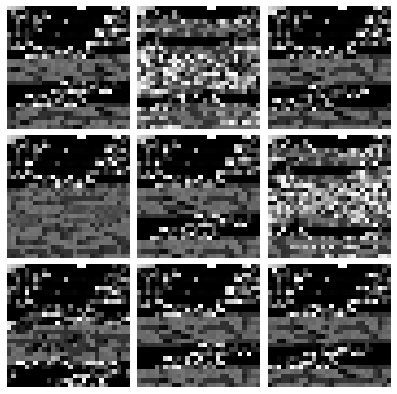

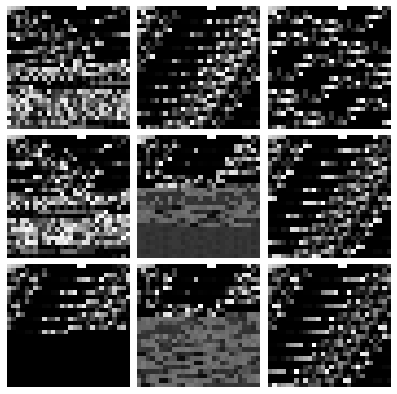

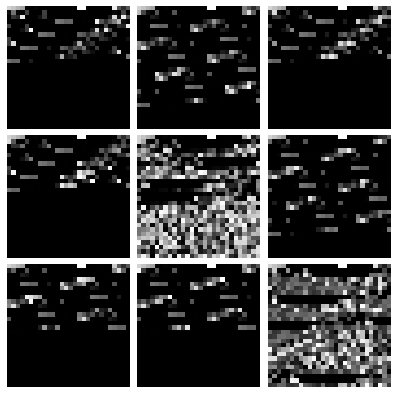

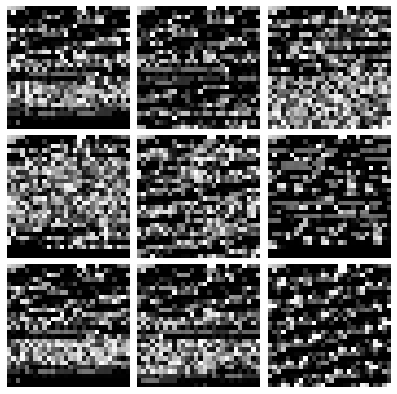

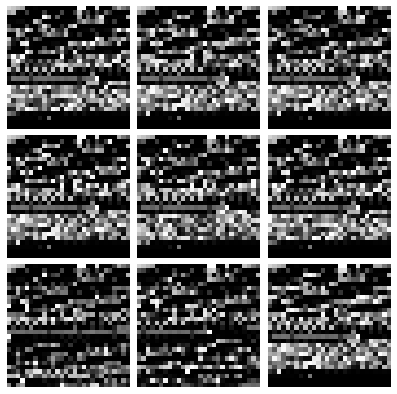

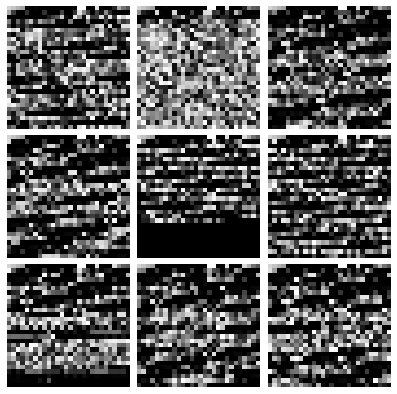

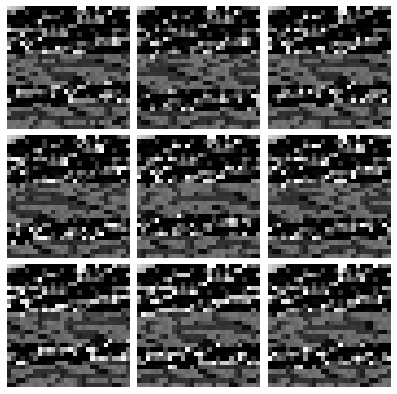

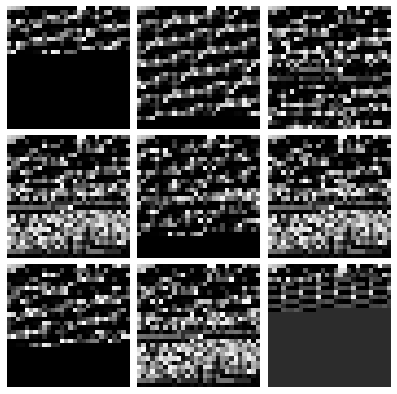

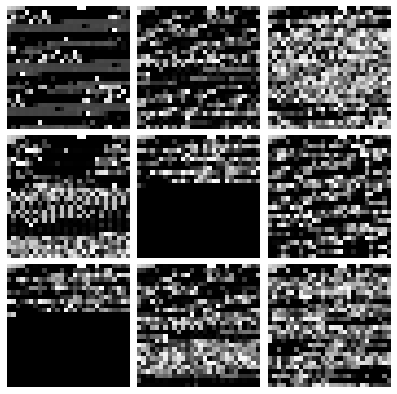

In [57]:
for pcap_name, pcap_index_list in label_list.items():
    save_pcap_image(pcap_name, pcap_index_list, pcap_data)